# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key
import pprint
import csv
# Import API key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

606


In [30]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
counter = 0
cloudiness = []
country = []
date = []
lat = []
lng = []
max_temp = []
wind_speed = []
humid = []
city_list = []
for city in cities:
    
    counter = counter + 1
    response = requests.get(query_url + city).json()
    
        
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        humid.append(response["main"]["humidity"])
        city_list.append(response["name"])
    #try:
        print(f"Processing record ({counter}): | {city}")
    except:
        print("City Not Found Skipping...")
    pass

    
    

Processing record (1): | lebu
Processing record (2): | bambous virieux
Processing record (3): | cidreira
Processing record (4): | alice springs
Processing record (5): | vallenar
City Not Found Skipping...
City Not Found Skipping...
Processing record (8): | chicama
Processing record (9): | hilo
Processing record (10): | middlebury
City Not Found Skipping...
Processing record (12): | kapaa
Processing record (13): | victoria
Processing record (14): | new norfolk
Processing record (15): | haljala
Processing record (16): | jamestown
Processing record (17): | salalah
Processing record (18): | arraial do cabo
Processing record (19): | bethel
City Not Found Skipping...
Processing record (21): | nuuk
Processing record (22): | saint-philippe
Processing record (23): | mataura
Processing record (24): | esperance
Processing record (25): | morgan city
Processing record (26): | san quintin
Processing record (27): | avarua
Processing record (28): | nanortalik
Processing record (29): | rikitea
Processi

In [33]:
print(len(city_list))
# to_csv(df)


542


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
print(len(lng))

542


In [35]:
weather_df = pd.DataFrame({"City" : city_list, "Cloudiness": cloudiness, "Country": country, "Date":date, "Humidity": humid, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
weather_df.head(50)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lebu,40,ET,1538244000,48,8.96,38.73,60.80,6.93
1,Bambous Virieux,75,MU,1538244000,94,-20.34,57.76,69.80,12.75
2,Cidreira,0,BR,1538248193,74,-30.17,-50.22,80.20,15.48
3,Alice Springs,0,AU,1538247600,43,-23.70,133.88,55.40,11.79
4,Vallenar,44,CL,1538248663,60,-28.58,-70.76,68.77,2.73
5,Chicama,20,PE,1538244000,77,-7.84,-79.15,66.20,12.75
6,Hilo,75,US,1538246640,87,19.71,-155.08,80.06,12.68
7,Middlebury,40,US,1538247360,38,44.01,-73.17,64.94,6.93
8,Kapaa,90,US,1538244060,93,22.08,-159.32,80.96,18.34
9,Victoria,75,BN,1538247600,88,5.28,115.24,80.60,5.64


In [36]:
weather_file = weather_df.to_csv("weather_csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

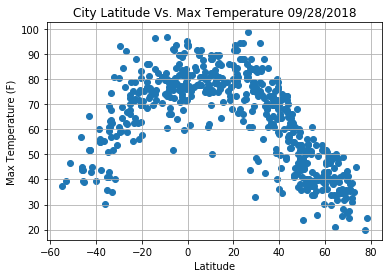

In [37]:

plt.scatter(lat, max_temp)
plt.title("City Latitude Vs. Max Temperature 09/28/2018")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("City Lat Vs Max Temp")

#### Latitude vs. Humidity Plot

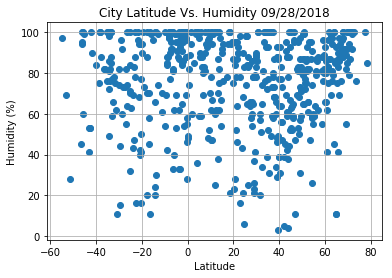

In [38]:
plt.scatter(lat, humid)
plt.title("City Latitude Vs. Humidity 09/28/2018")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("City Lat Vs Humidity")

#### Latitude vs. Cloudiness Plot

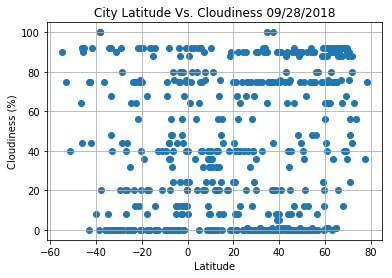

In [39]:
plt.scatter(lat, cloudiness)
plt.title("City Latitude Vs. Cloudiness 09/28/2018")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("City Lat Vs Cloudiness")

#### Latitude vs. Wind Speed Plot

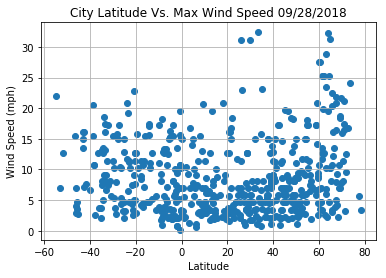

In [40]:
plt.scatter(lat, wind_speed)
plt.title("City Latitude Vs. Max Wind Speed 09/28/2018")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("City Lat Vs Max Wind Speed")

In [ ]:
#Observation 1) It appears that the highest max wind speeds occur in the northern hemisphere at this time. 

#Observation 2) There seems to be a pretty strong bell curve demonstrating that as you are closer to the equator the warmer it is. 

#Observation 3) Of the cities sampled, the majority of them have at least over 20% humidity. 